In [2]:
import scipy.stats as sts
import numpy as np
import math
import matplotlib.pyplot as plt
#import pandas as pd
from functools import reduce
import seaborn as sns

In [3]:
X1, X2, X3, X4, X5 = sts.norm(2.05, 1).rvs(500), sts.norm(1.99, 1).rvs(200), sts.norm(2, 1).rvs(456), sts.norm(2, 1).rvs(73), sts.norm(2, 1).rvs(105)

In [4]:
d1, d2 = {'X1':X1, 'X2':X2, 'X3':X3, 'X4':X4, 'X5':X5}, {'X1':X1, 'X2':X2, 'X3':X3}

In [12]:
def ANOVA_test(data, alpha, W = 0):
    X = reduce(lambda x, y: np.concatenate((x, y), axis = 0), data.values()) # объединенная выборка
    n = len(X) # количество элементов в объединенной выборке
    k = len(data.keys()) # количество выборок
    n_j = np.array([len(x) for x in data.values()]) # вектор длин столбцов
    MSE = 1/(n - k) * sum(np.array([x.var() for x in data.values()]) * n_j) # Mean Square for Errors
    X_mean = X.mean() # выборочное среднее в объединенной выборке
    X_j = np.array([x.mean() for x in data.values()]) # вектор выборочных средних в выборках
    MSTR = 1/(k - 1) * sum((X_j - X_mean)**2 * n_j) # Mean Square for Treatemnts
    F_stat = MSTR/MSE # Наблюдаемое значение F-статистики критерия
    F = sts.f(k - 1, n - k) # Распределение Фишера с k - 1, n - k степенями свободы
    c_alpha = F.isf(alpha) # критическая точка
    p_value = F.sf(F_stat) 
    print(n_j)
    df_str = 'df' # строковая запись df
    MS_str = 'MS' # строковая запись MS
    F_str = 'F_stat' # строковая запись F_stat
    p_value_str = 'p-value' # строковая запись p-value
    cr_val_str = 'critical value'
    MS_len_max = max(len(str(round(MSTR, 8))), len(str(round(MSE, 8)))) # Для таблички
    print(f'Source of variation |   SS  |{df_str:^{len(str(n - 1))}}|{MS_str:^{MS_len_max}}|{F_str:^{len(str(F_stat))}}|{p_value_str:^{len(str(p_value))}}|{cr_val_str:^{len(str(p_value))}}|')
    print('_____________________________________________________________________________________________________')
    print(f'Treatments          | SSTR  |{k - 1:^{len(str(n - 1))}}|{round(MSTR, 8):^{MS_len_max}}|{F_stat}|{p_value}|{c_alpha}|')
    print(f'Errors              |  SSE  |{n - k:^{len(str(n - 1))}}|{round(MSE, 8):^{MS_len_max}}|')
    print(f'Total               | SSTOT |{n - 1}|')
    if F_stat < c_alpha:
        plt.subplots(figsize = (10, 10))
        x = np.linspace(F.ppf(0.01), F.ppf(0.99), 100)
        Y = F.pdf(x)
        plt.plot(x, Y, color = 'g', label = 'График плотности распределения Фишера')
        plt.plot(F_stat, F.pdf(F_stat), 'go', label = 'Наблюдаемое значение статистики')
        plt.plot(c_alpha, F.pdf(c_alpha), 'ro', label = 'Критическое значение')
        plt.fill_between(x[x >= c_alpha], y1=0, y2=F.pdf(x[x >= c_alpha]), alpha = 0.3, color = 'r', label = 'Критическая область')
        plt.annotate((F_stat, F.pdf(F_stat)),
            xy=(F_stat, F.pdf(F_stat)), 
            xytext=(0.1 , 0.7),    
            textcoords='figure fraction', 
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        plt.annotate((c_alpha, F.pdf(c_alpha)),
            xy=(c_alpha, F.pdf(c_alpha)), 
            xytext=(0.3 , 0.6), 
            textcoords='figure fraction', 
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        plt.grid()
        plt.legend()
        
    else:
        plt.subplots(figsize = (10, 10))
        x = np.linspace(F.ppf(0.01), F_stat, 1000)
        y = F.pdf(x)
        plt.plot(x, y, color = 'g', label = 'График плотности распределения Фишера')
        plt.plot(F_stat, F.pdf(F_stat), 'go', label = 'Наблюдаемое значение статистики')
        plt.plot(c_alpha, F.pdf(c_alpha), 'ro', label = 'Критическое значение')
        plt.fill_between(x[x >= c_alpha], y1=0, y2=F.pdf(x[x >= c_alpha]), alpha = 0.3, color = 'r', label = 'Критическая область')
        plt.annotate((F_stat, F.pdf(F_stat)),
            xy=(F_stat, F.pdf(F_stat)), 
            xytext=(0.1 , 0.7),    
            textcoords='figure fraction', 
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        plt.annotate((c_alpha, F.pdf(c_alpha)),
            xy=(c_alpha, F.pdf(c_alpha)), 
            xytext=(0.3 , 0.6), 
            textcoords='figure fraction', 
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        plt.grid()
        plt.legend()
    if W:
        mu_power = []
        for t in range(len(data.keys())):
            mu = float(input(f'Введите среднее для {t + 1}-ой группы\t'))
            mu_power.append(mu)
        mu_power = np.array(mu_power)
        S = 1 #X.std(ddof=1) # оценка для параметра масштаба объединенной выборки (они равны по допущениям модели)
        mu_w = 1/n * sum(mu_power * n_j)# взвешенное среднее
        lam = sum(n_j * (mu_power - mu_w)**2)/S**2 # параметр нецентральности
        F_nc = sts.ncf(dfn = k - 1, dfd = n - k, nc = lam) # нецентральное распределение Фишера
        W = F_nc.sf(F.isf(alpha))
        print(f'Мощность критерия равна {W}')

[500 200 456]
Source of variation |   SS  | df |    MS    |     F_stat      |      p-value      |  critical value   |
_____________________________________________________________________________________________________
Treatments          | SSTR  | 2  |4.90404646|4.875432068134078|0.00778986365422462|3.0035293047660168|
Errors              |  SSE  |1153|1.0058691 |
Total               | SSTOT |1155|


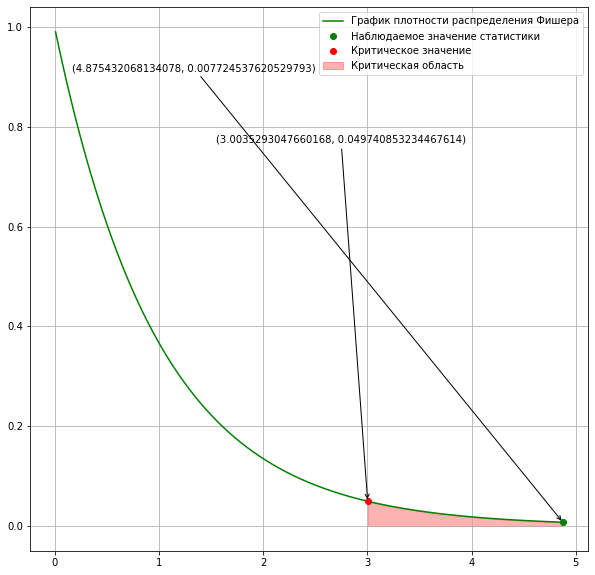

In [13]:
ANOVA_test(d2, 0.05)

In [25]:
X = reduce(lambda x, y: np.concatenate((x, y), axis = 0), d2.values())
S = 1
n = len(X)
k = len(d2.keys())
n_j = np.array([len(x) for x in d2.values()])
mu_1 = 2
mu_2 = 1.9
mu_3 = np.linspace(-2 * d2['X3'].mean(), 2 * d2['X3'].mean(), 10000)
lam = []
for i in range(10000):
    mu_power = np.array([mu_1, mu_2, mu_3[i]])
    mu_w = 1/n * sum(mu_power * n_j)
    lam.append(sum(n_j * (mu_power - mu_w)**2)/S**2)
W = []
F = sts.f(dfn = k - 1, dfd = n - k)
for l in lam:
    F_nc = sts.ncf(dfn = k - 1, dfd = n - k, nc = l)
    W.append(F_nc.sf(F.isf(0.05)))


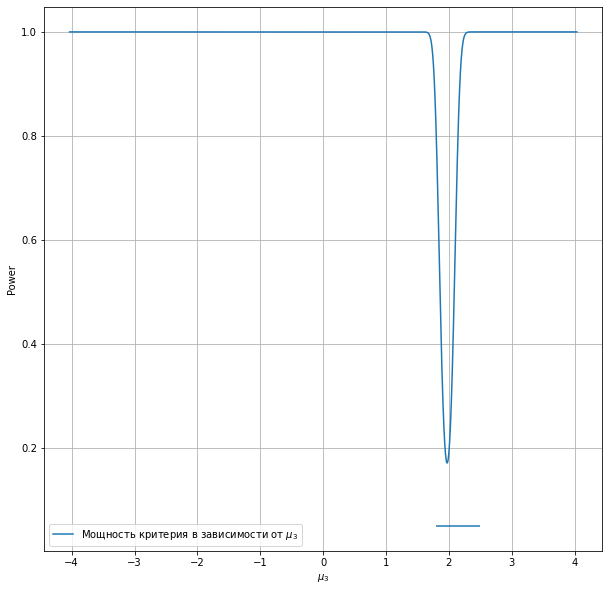

In [27]:
plt.figure(figsize=(10, 10))
plt.plot(mu_3, W, label = 'Мощность критерия в зависимости от $\mu_3$')
plt.grid()
plt.xlabel('$\mu_3$')
plt.ylabel('Power')
plt.xlim(1.975, 2.025)
plt.ylim(0.049, 0.051)
plt.hlines(0.05, 1.8, 2.5)
plt.legend()
plt.show()

In [7]:
X = reduce(lambda x, y: np.concatenate((x, y), axis = 0), d2.values())
S = X.std(ddof=1)
n = len(X)
k = len(d2.keys())
n_j = np.array([len(x) for x in d2.values()])
mu_1 = d2['X1'].mean()
mu_2 = np.linspace(0, 2 * d2['X2'].mean(), 100)
mu_3 = np.linspace(0, 2 * d2['X3'].mean(), 100)
X, Y = np.meshgrid(mu_2, mu_3)
lam = []
def power_anova(a, b):
    global n, n_j, S, mu_1
    mu_power = np.array([mu_1, a, b])
    mu_w = 1/n * sum(mu_power * n_j)
    lam = sum(n_j * (mu_power - mu_w)**2)/S**2
    F_nc = sts.ncf(dfn = k - 1, dfd = n - k, nc = lam)
    F = sts.f(dfn = k - 1, dfd = n - k)
    return F_nc.sf(F.isf(0.05))
W = np.stack(np.vectorize(power_anova)(X, Y), axis=1)
print(mu_1)

2.113331414727148


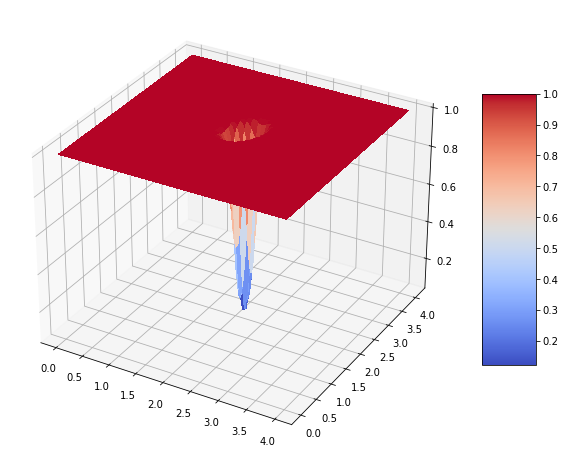

In [8]:
from matplotlib import cm
fig, ax = plt.subplots(figsize= (10, 10), subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, W, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Miktech, wineddt, МНСК, Воронеж, Цель: найти пересечение с y = $\alpha$